In [1]:
from numpy import *
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import *
from pylab import *
%matplotlib inline

In [2]:
import os
cwd = os.getcwd() # directorio actual
print(cwd) # imprimir directorio actual

for file in os.listdir():
    if file.endswith(".csv"):
        print(os.path.join(file)) # imprimir todos los archivos con terminación deseada

/home/ibarron/Algoritmos2019-2/ProyectoAlgoritmos2019/ProyectoAlgoritmos
2019_05_14-17_16_25_Summary.csv
2019_05_14-17_16_25_Accel.csv


In [3]:
Datos = loadtxt("2019_05_14-17_16_25_Summary.csv", delimiter=",",skiprows=1,usecols=range(1,34))
print(len(Datos))
print(Datos.shape)
print(Datos)

2138
(2138, 33)
[[   65.     10.  -3276.8 ...  6553.5   422.    431. ]
 [   65.     10.  -3276.8 ...  6553.5   427.    426. ]
 [   65.     10.  -3276.8 ...  6553.5   414.    420. ]
 ...
 [  105.     23.  -3276.8 ...    38.    412.    418. ]
 [  105.     23.  -3276.8 ...    38.    414.    420. ]
 [  105.     23.  -3276.8 ...    38.    417.    425. ]]


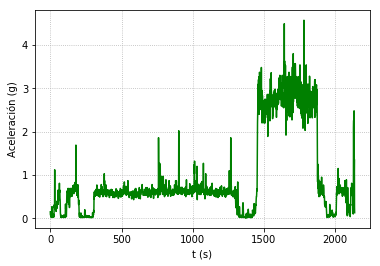

In [4]:
Acc=Datos[:,5]; #Toma todos los valores especificos de la columna 5
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('Aceleración (g)')
plt.show()

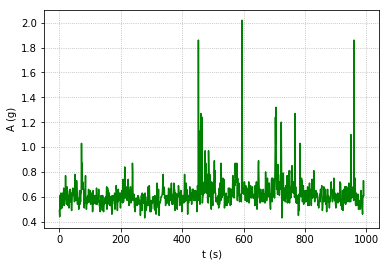

In [5]:
tMin=307
tMax=1300
plt.plot(Acc[tMin:tMax],'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('A (g)')
plt.show()

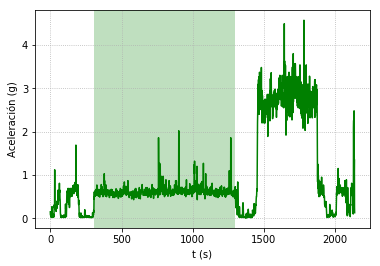

In [7]:
plt.axvspan(tMin,tMax,facecolor='g',alpha=.25)
Acc=Datos[:,5]; #Toma todos los valores especificos de la columna 5
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('Aceleración (g)')
plt.show()

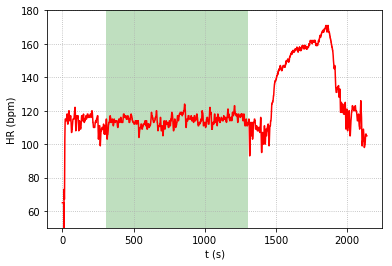

In [8]:
HR=Datos[:,0];
plt.plot(HR,'r')
plt.ylim(50,180)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=.25)
plt.xlabel('t (s)')
plt.ylabel('HR (bpm)')
plt.show()

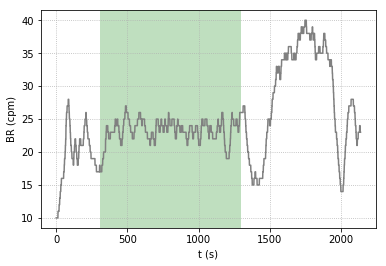

In [9]:
# Frecuencia respiratoria (breathing rate BR) 
# se mide a partir de los intervalos de tiempo entre 2 inspiraciones o expiraciones sucesivas
# se mide en ciclos por minuto (cycles per minute cpm)
BR=Datos[:,1];
plt.plot(BR,'grey')
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BR (cpm)')
plt.show()

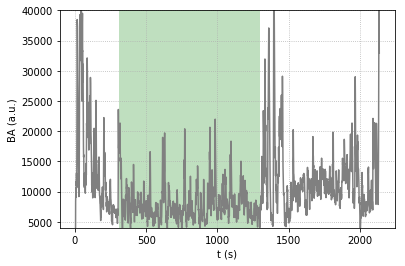

In [10]:
# La amplitud respiratoria (breathing ampltitude BA) se estima a partir del estira-afloja del cinturón
# BA se mide en unidades arbitrarias (arbitrary units a.u.)
BA=Datos[:,8];
plt.plot(BA,'grey')
plt.ylim(4000,40000)
plt.grid(ls=":")
plt.axvspan(tMin,tMax,facecolor='g',alpha=0.25)
plt.xlabel('t (s)')
plt.ylabel('BA (a.u.)')
plt.show()

In [11]:
Accel = np.loadtxt("2019_05_14-17_16_25_Accel.csv", delimiter=",",skiprows=1,usecols=range(1,4))
print(len(Accel))
print(Accel.shape)

213800
(213800, 3)


In [12]:
# Seleccionar fragmento de la caminata del archivo de resumen, tomando en cuenta que la frecuencia de muestreo aquí es 100x mayor
aZ=Accel[100*tMin:100*tMax,0] 
aY=Accel[100*tMin:100*tMax,1]
aX=Accel[100*tMin:100*tMax,2]

In [13]:
az=(aZ-2048)/83
ay=(aY-2048)/83
ax=(aX-2048)/83


In [14]:
ayy=ay-mean(ay)
azz=az-mean(az)
axx=ax-mean(ax)
a=sqrt(axx**2+ayy**2+azz**2)

In [17]:
aYY=ayy.shape[0]
aXX= axx.shape[0]
aZZ= azz.shape[0]

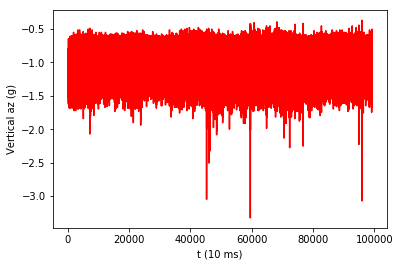

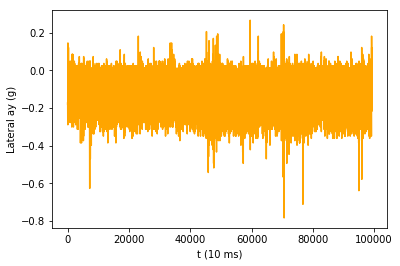

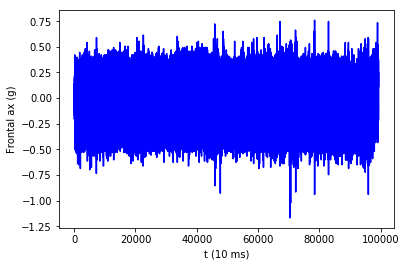

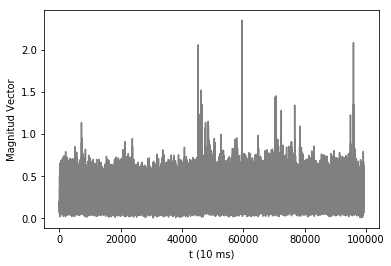

In [18]:
plt.clf()
plt.plot(az,'red')
plt.xlabel('t (10 ms)')
plt.ylabel('Vertical az (g)')
plt.show()
plt.plot(ay,'orange')
plt.xlabel('t (10 ms)')
plt.ylabel('Lateral ay (g)')
plt.show()
plt.plot(ax,'blue')
plt.xlabel('t (10 ms)')
plt.ylabel('Frontal ax (g)')
plt.show()
plt.plot(a,'grey')
plt.xlabel('t (10 ms)')
plt.ylabel('Magnitud Vector')
plt.show()

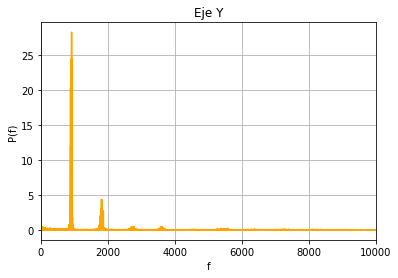

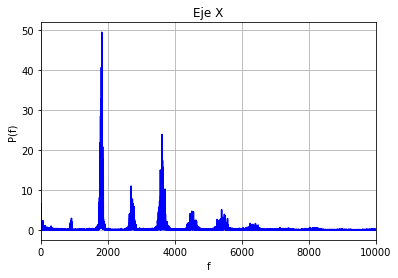

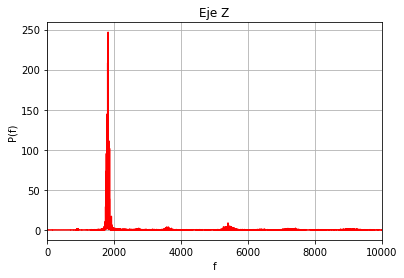

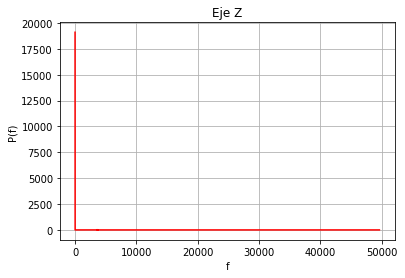

In [20]:
ayyf=(2.0/aYY*abs(fft(ayy))**2)
plt.clf()
plt.plot(aYY)

plt.clf()
plt.plot(ayyf[0:aYY//2],"orange")#muestra todas las frecuencias
plt.grid()
plt.title ("Eje Y")
plt.xlabel('f')
plt.ylabel('P(f)')
xlim(0,10000)
plt.show()


axxf=(2.0/aXX*abs(fft(axx))**2)
plt.clf()
plt.plot(aXX)

plt.clf()
plt.plot(axxf[0:aXX//2],'blue')#muestra todas las frecuencias
plt.grid()
plt.title ("Eje X")
plt.xlabel('f')
plt.ylabel('P(f)')
xlim(0,10000)
plt.show()


azzf=(2.0/aZZ*abs(fft(azz))**2)
plt.clf()
plt.plot(aZZ)

plt.clf()
plt.plot(azzf[0:aZZ//2], 'red')#muestra todas las frecuencias
plt.grid()
plt.title ("Eje Z")
plt.xlabel('f')
plt.ylabel('P(f)')
xlim(0,10000)
plt.show()


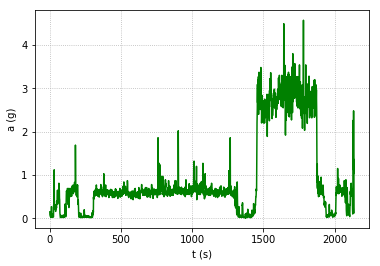

In [10]:
Acc=Datos[:,5]; #Toma todos los valores especificos de la columna 5
plt.plot(Acc,'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

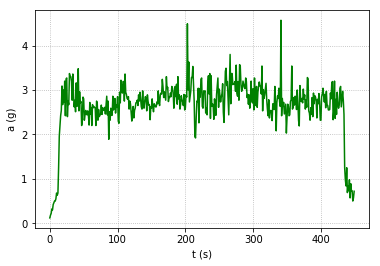

In [36]:
tMin=1440
tMax=1890
plt.plot(Acc[tMin:tMax],'g')
plt.grid(ls=":")
plt.xlabel('t (s)')
plt.ylabel('a (g)')
plt.show()

In [37]:
aZ=Accel[100*tMin:100*tMax,0] 
aY=Accel[100*tMin:100*tMax,1]
aX=Accel[100*tMin:100*tMax,2]
az=(aZ-2048)/83
ay=(aY-2048)/83
ax=(aX-2048)/83
ayy=ay-mean(ay)
azz=az-mean(az)
axx=ax-mean(ax)
a=sqrt(axx**2+ayy**2+azz**2)
aYY=ayy.shape[0]
aXX= axx.shape[0]
aZZ= azz.shape[0]

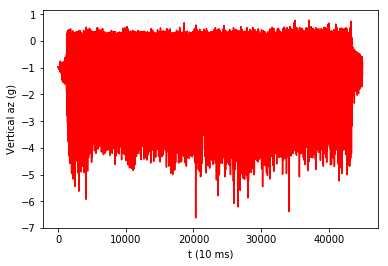

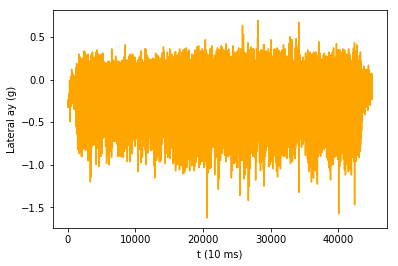

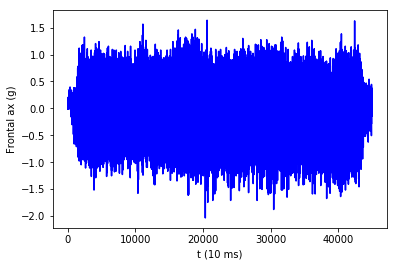

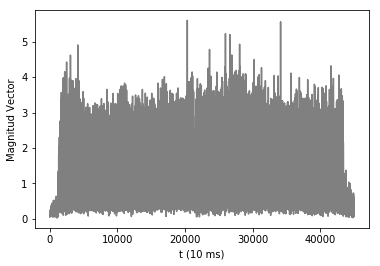

In [38]:
plt.clf()
plt.plot(az,'red')
plt.xlabel('t (10 ms)')
plt.ylabel('Vertical az (g)')
plt.show()
plt.plot(ay,'orange')
plt.xlabel('t (10 ms)')
plt.ylabel('Lateral ay (g)')
plt.show()
plt.plot(ax,'blue')
plt.xlabel('t (10 ms)')
plt.ylabel('Frontal ax (g)')
plt.show()
plt.plot(a,'grey')
plt.xlabel('t (10 ms)')
plt.ylabel('Magnitud Vector')
plt.show()

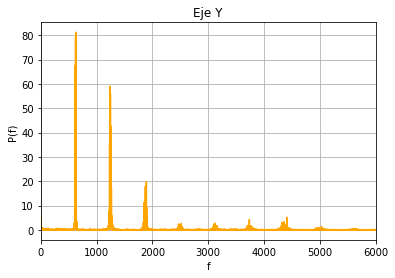

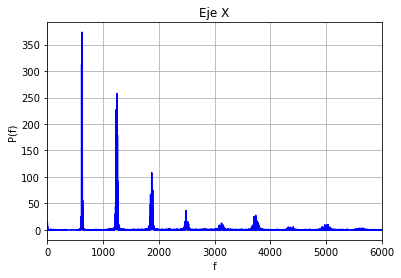

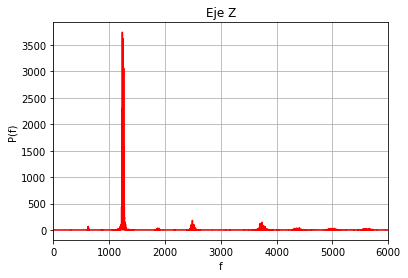

In [39]:
ayyf=(2.0/aYY*abs(fft(ayy))**2)
plt.clf()
plt.plot(aYY)

plt.clf()
plt.plot(ayyf[0:aYY//2], 'orange')#muestra todas las frecuencias
plt.grid()
plt.title ("Eje Y")
plt.xlabel('f')
plt.ylabel('P(f)')
xlim(0,6000)
plt.show()


axxf=(2.0/aXX*abs(fft(axx))**2)
plt.clf()
plt.plot(aXX)

plt.clf()
plt.plot(axxf[0:aXX//2], 'blue')#muestra todas las frecuencias
plt.grid()
plt.title ("Eje X")
plt.xlabel('f')
plt.ylabel('P(f)')
xlim(0,6000)
plt.show()


azzf=(2.0/aZZ*abs(fft(azz))**2)
plt.clf()
plt.plot(aZZ)

plt.clf()
plt.plot(azzf[0:aZZ//2], 'red')#muestra todas las frecuencias
plt.grid()
plt.title ("Eje Z")
plt.xlabel('f')
plt.ylabel('P(f)')
xlim(0,6000)
plt.show()